# Task 1: Dataset Exploration and Preprocessing (1.5 điểm)

## Mục tiêu
- Chọn một vùng và load dữ liệu vào DataFrame
- Parse datetime, chuẩn hóa dữ liệu
- Trực quan hóa dữ liệu: xu hướng, tính mùa vụ, xử lý missing data
- Xây dựng lớp WindowGenerator hỗ trợ dự báo single-step
- Chia tập train, validation, test

## Yêu cầu hoàn thành
✅ Data loading và parsing với datetime formatting  
✅ Data normalization và missing value handling  
✅ Comprehensive visualizations  
✅ WindowGenerator class implementation  
✅ Train/validation/test splits


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# Import our custom modules
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

from time_series_forecasting.analysis.lab_interface.lab4_interface import Lab4Interface
from time_series_forecasting.core import DataLoader, WindowGenerator
from time_series_forecasting.analysis.visualization import create_report_plots

print("Libraries imported successfully!")
print("Package structure:")
print("✓ Lab4Interface")
print("✓ DataLoader") 
print("✓ WindowGenerator")
print("✓ Visualization tools")


2025-07-22 22:13:29.366965: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-22 22:13:29.374615: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753197209.383436   53217 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753197209.386034   53217 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753197209.392871   53217 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Libraries imported successfully!
Package structure:
✓ Lab4Interface
✓ DataLoader
✓ WindowGenerator
✓ Visualization tools


## 1.1 Data Loading và Preprocessing

Chúng ta sẽ sử dụng dữ liệu PJM East (PJME) hourly energy consumption.


In [2]:
# Configuration
config = {
    'data_path': '../data/PJME_hourly.csv',
    'region': 'PJME', 
    'target_col': 'MW',
    'datetime_col': 'Datetime',
    'input_width': 24,
    'label_width': 1,
    'shift': 1
}

print("Configuration:")
for key, value in config.items():
    print(f"  {key}: {value}")

# Initialize Lab4Interface
lab = Lab4Interface()
print("\n✓ Lab4Interface initialized successfully!")


Configuration:
  data_path: ../data/PJME_hourly.csv
  region: PJME
  target_col: MW
  datetime_col: Datetime
  input_width: 24
  label_width: 1
  shift: 1

✓ Lab4Interface initialized successfully!


In [3]:
# Load and preprocess data
print("Loading data...")
data = lab.load_data(config['data_path'], region=config['region'])

print(f"✓ Data loaded successfully!")
print(f"  Shape: {data.shape}")
print(f"  Date range: {data.index.min()} to {data.index.max()}")
print(f"  Columns: {list(data.columns)}")

# Display first few rows
print("\nFirst 5 rows:")
print(data.head())


Loading data...
Auto-detected PJM format:
  Datetime -> 'Datetime'
  PJME_MW -> 'MW'
Loaded data shape: (145366, 2)
Columns: ['Datetime', 'MW']
Parsed datetime. Date range: 2002-01-01 01:00:00 to 2018-08-03 00:00:00
Missing values before handling: 0
Missing values after handling: 0
Removed 4 duplicate rows
Missing values before handling: 1318
Missing values after handling: 0
Removed 1318 outliers using zscore method
Transformed 1 columns using minmax scaling
✓ Data loaded successfully!
  Shape: (145362, 1)
  Date range: 2002-01-01 01:00:00 to 2018-08-03 00:00:00
  Columns: ['MW']

First 5 rows:
                           MW
Datetime                     
2002-01-01 01:00:00  0.429187
2002-01-01 02:00:00  0.398641
2002-01-01 03:00:00  0.374052
2002-01-01 04:00:00  0.361650
2002-01-01 05:00:00  0.365928


## 1.2 Data Analysis và Statistics


In [4]:
# Comprehensive data analysis
print("Performing data analysis...")
analysis_results = lab.analyze_data(target_col=config['target_col'])

print("✓ Data analysis completed!")
print("\nAnalysis Summary:")

# Basic statistics - safe formatting
basic_stats = analysis_results.get('basic_stats', {})
descriptive_stats = basic_stats.get('descriptive_stats', {})

def safe_format(value, default='N/A'):
    """Safely format numeric values"""
    if isinstance(value, (int, float)):
        return f"{value:.2f}"
    return default

print(f"  Mean: {safe_format(descriptive_stats.get('mean'))} MW")
print(f"  Std: {safe_format(descriptive_stats.get('std'))} MW") 
print(f"  Min: {safe_format(descriptive_stats.get('min'))} MW")
print(f"  Max: {safe_format(descriptive_stats.get('max'))} MW")
print(f"  Total records: {basic_stats.get('total_records', 'N/A')}")

# Missing data info
missing_values = basic_stats.get('missing_values', 0)
print(f"\nMissing values: {missing_values}")
print(f"Data completeness: {(1 - missing_values / len(data)) * 100:.1f}%")

# Anomalies
anomalies = analysis_results.get('anomalies', {})
anomaly_count = len(anomalies.get('anomaly_indices', []))
print(f"Anomalies detected: {anomaly_count} ({anomaly_count/len(data)*100:.2f}%)")

# Seasonality detection
seasonality = analysis_results.get('seasonality', {})
print(f"Has seasonality: {seasonality.get('has_seasonality', 'Unknown')}")

# Trends
trends = analysis_results.get('trends', {})
trend_summary = trends.get('trend_summary', {})
print(f"Trend direction: {trend_summary.get('direction', 'Unknown')}")
print(f"Trend significant: {trend_summary.get('significant', 'Unknown')}")


Performing data analysis...
✓ Data analysis completed!

Analysis Summary:
  Mean: 0.47 MW
  Std: 0.17 MW
  Min: 0.00 MW
  Max: 1.00 MW
  Total records: 145362

Missing values: 0
Data completeness: 100.0%
Anomalies detected: 314 (0.22%)
Has seasonality: True
Trend direction: decreasing
Trend significant: True


## 1.3 Data Visualization


Creating visualizations...
✓ Created 6 visualization plots
  Available plots:
    - time_series
    - seasonal
    - distribution
    - trends
    - anomalies
    - correlation


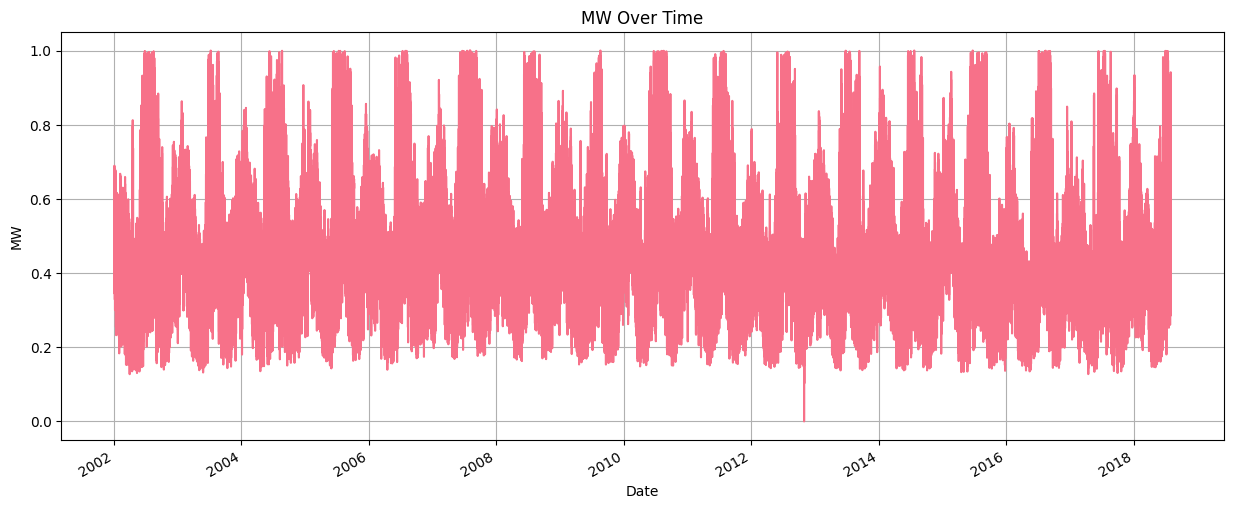

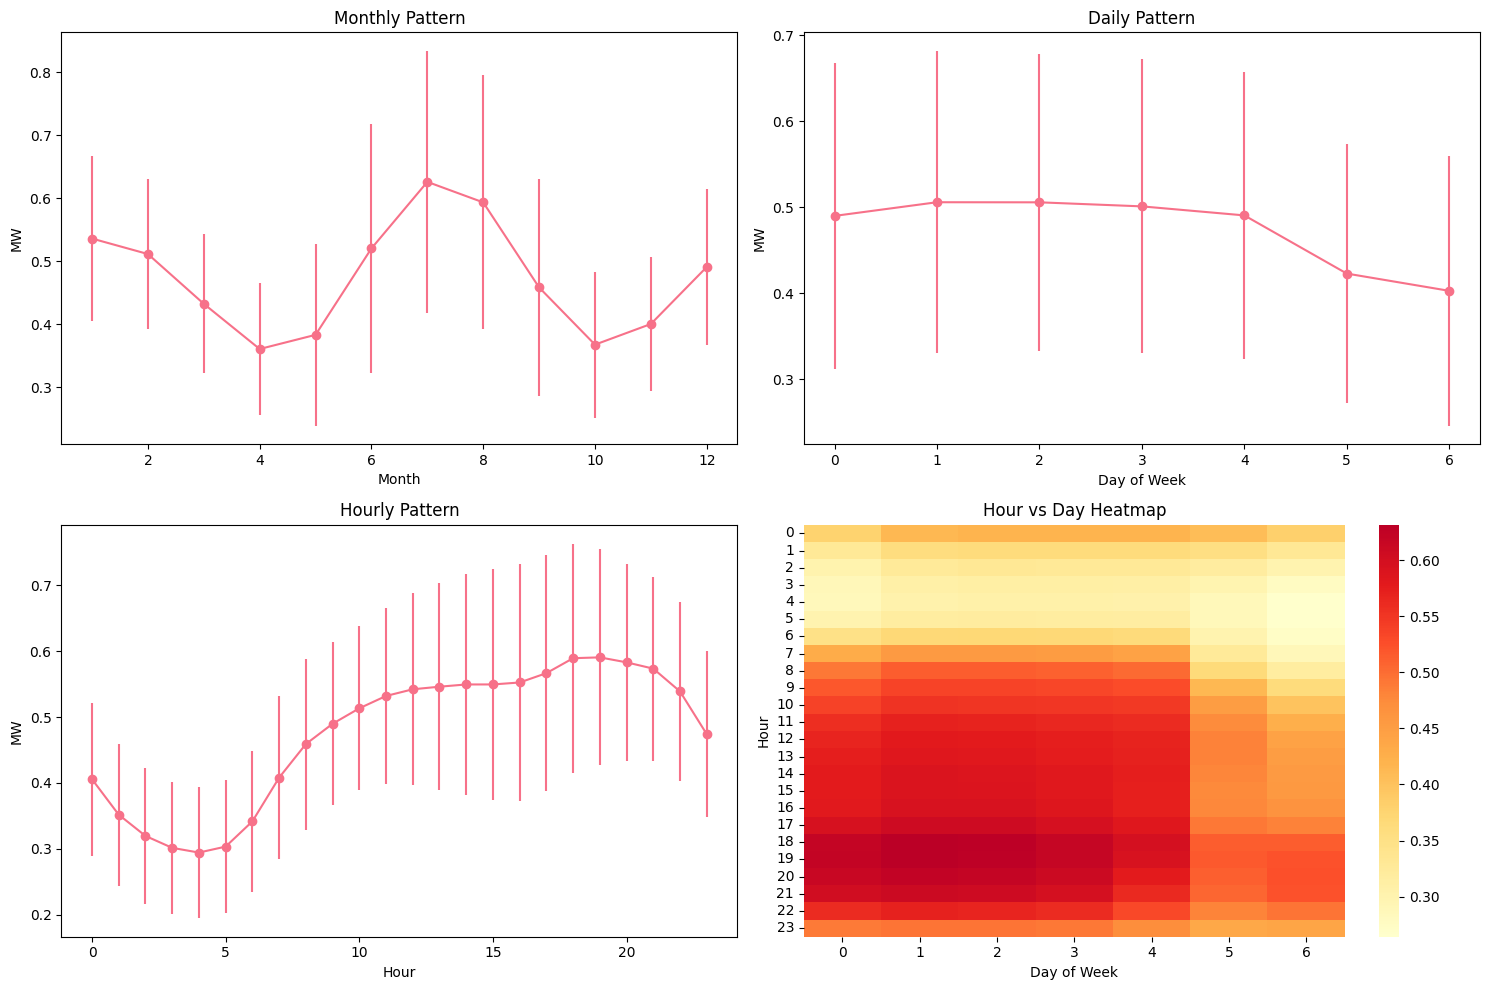

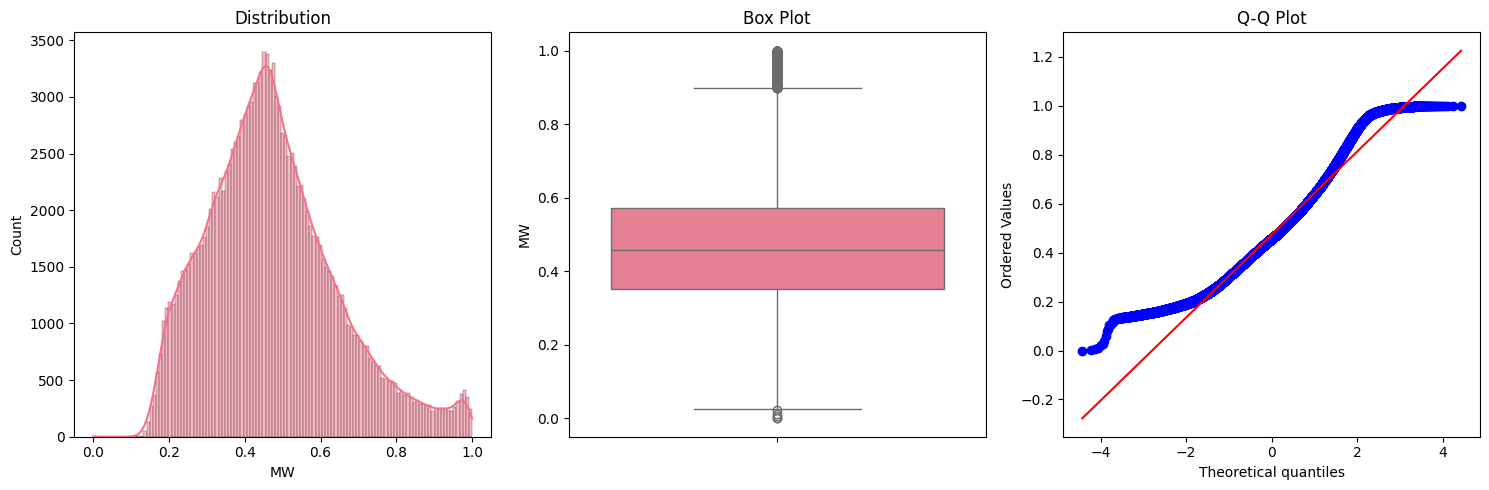

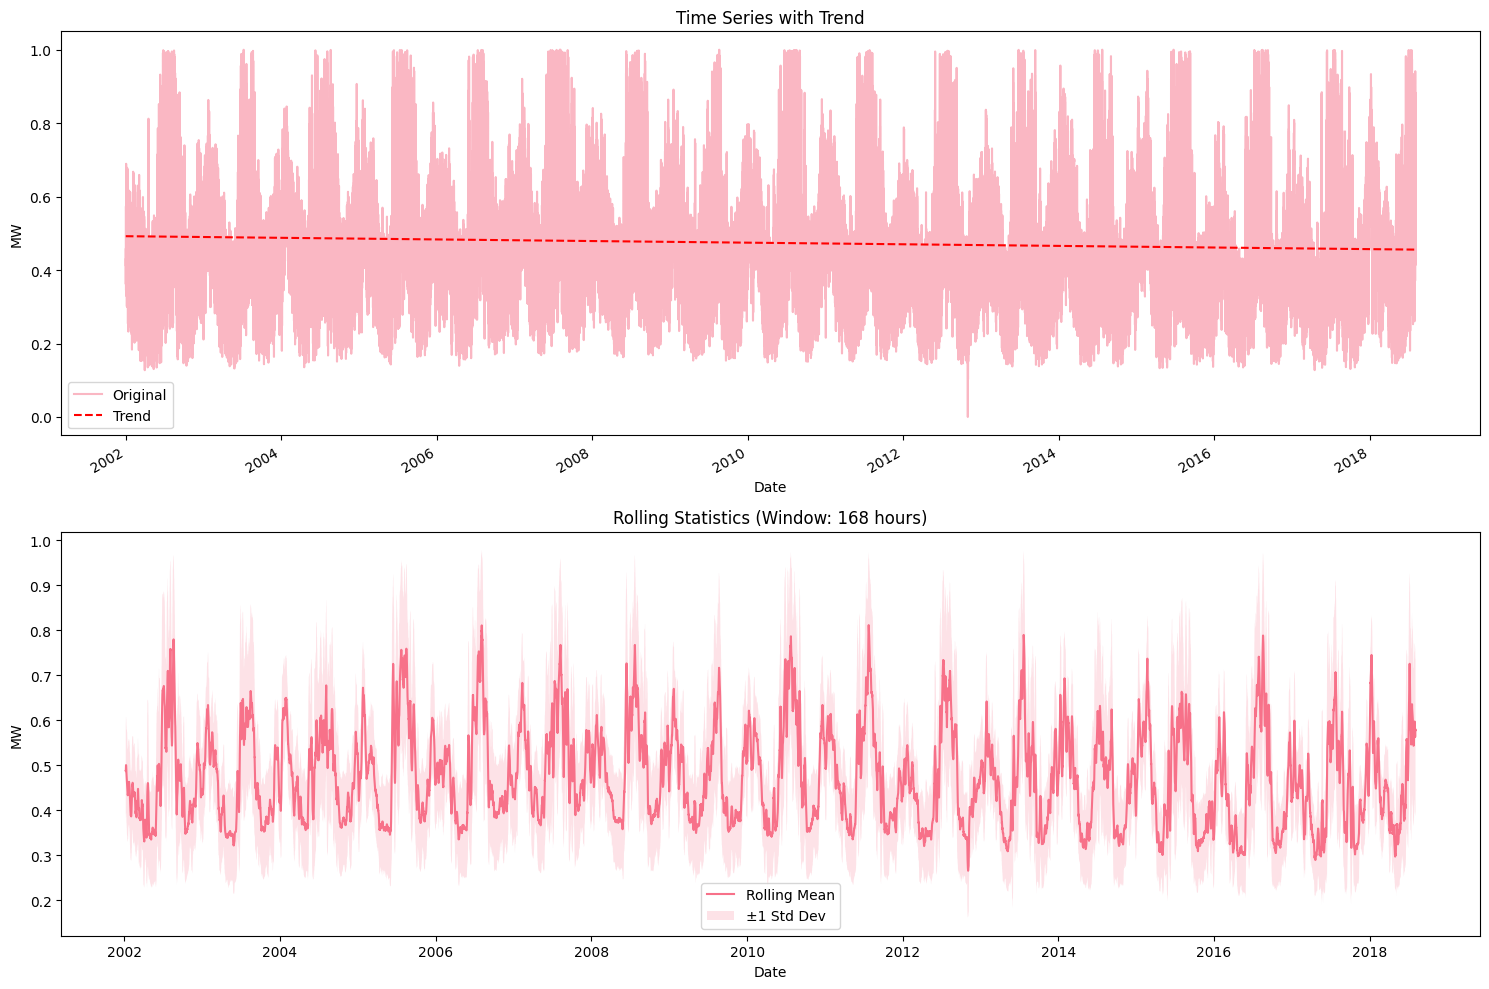

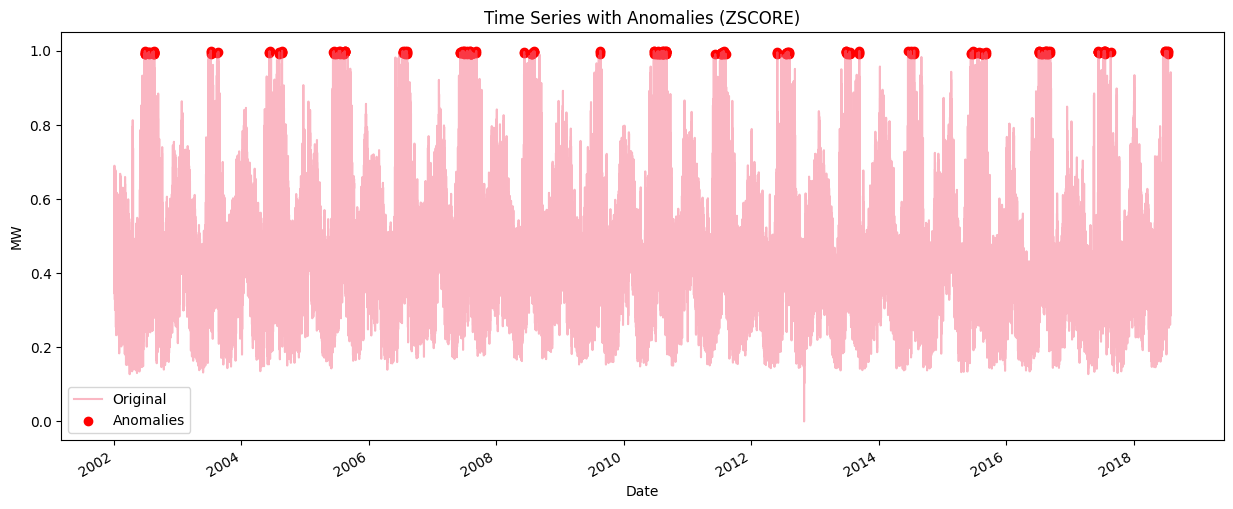

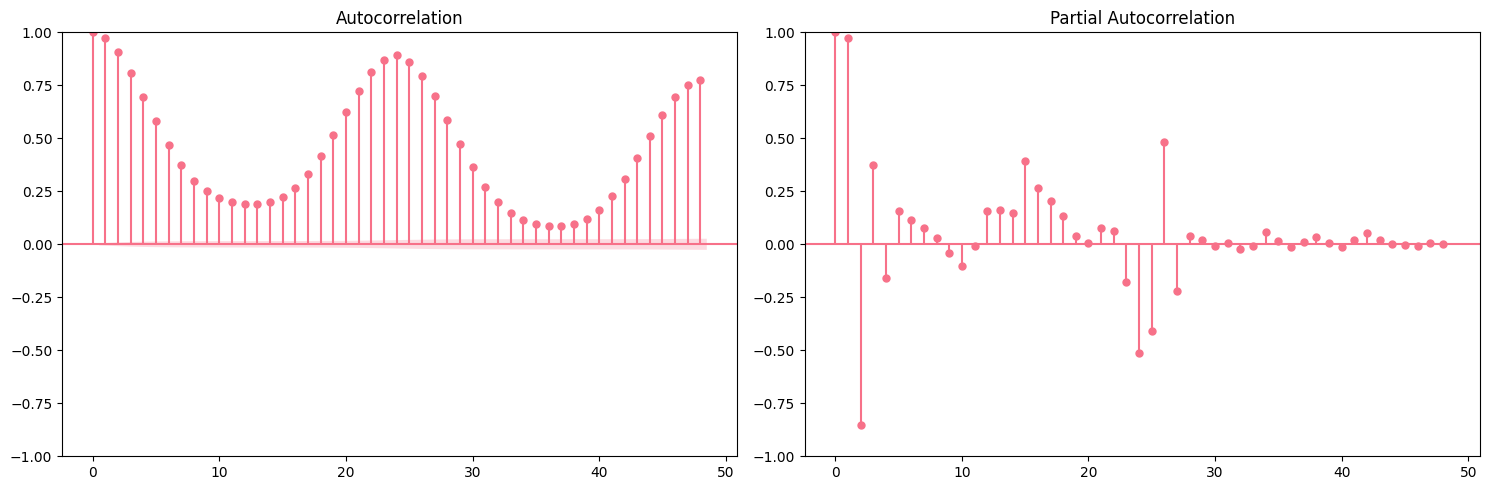

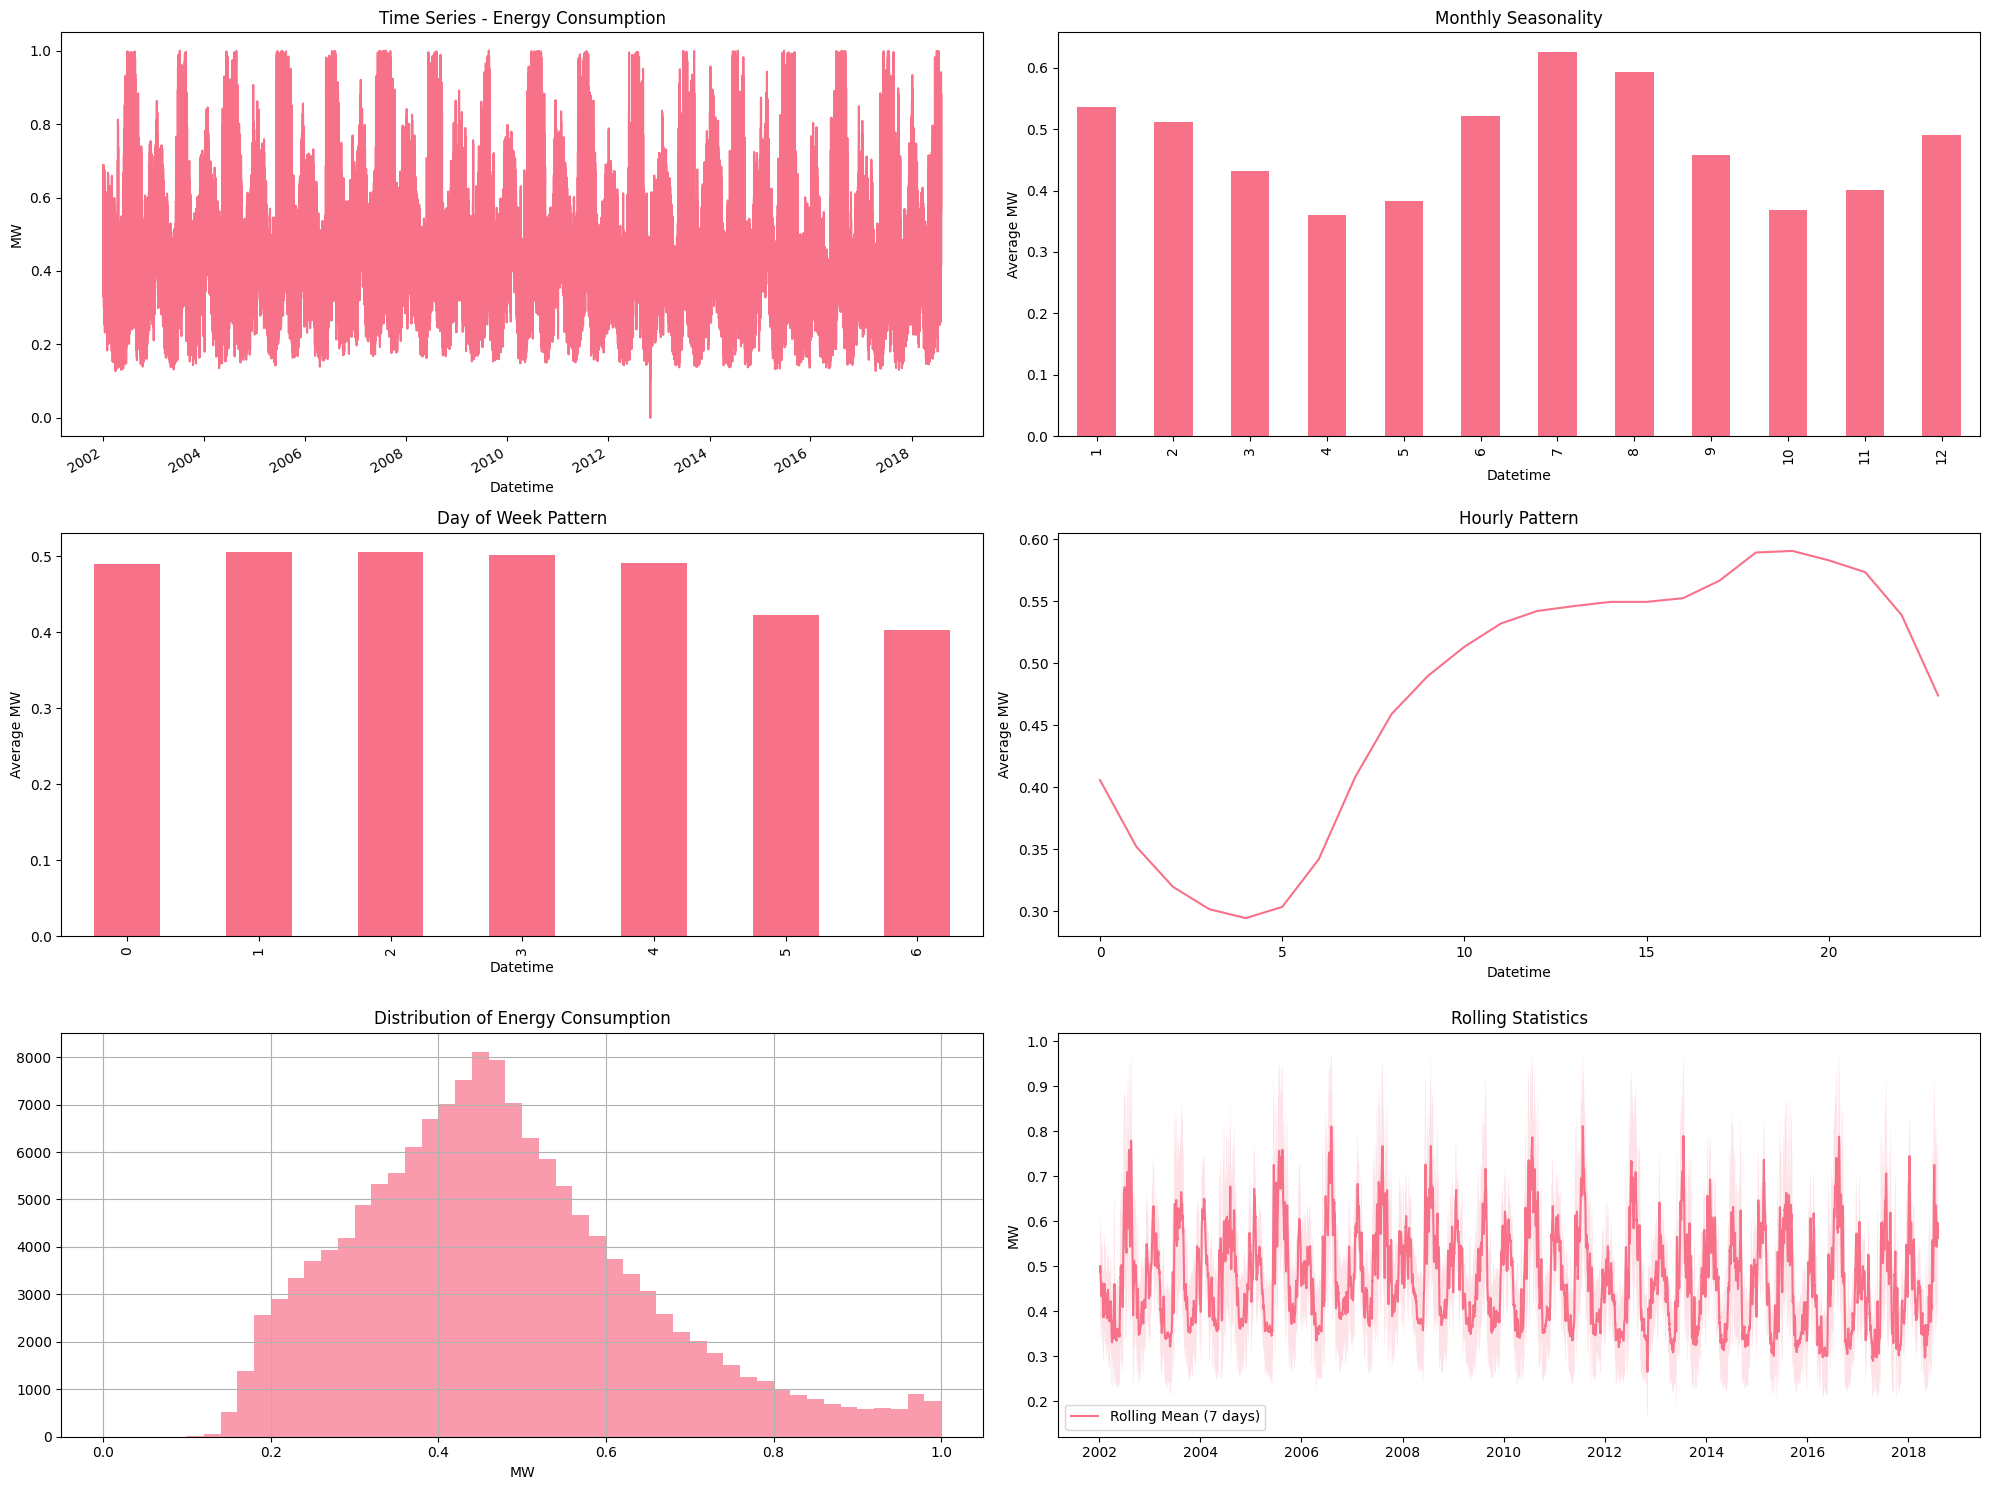

In [5]:
# Create comprehensive visualizations
print("Creating visualizations...")
plots = lab.create_visualizations(
    target_col=config['target_col'],
    output_dir='task1_plots'
)

print(f"✓ Created {len(plots)} visualization plots")
print("  Available plots:")
for plot_name in plots.keys():
    print(f"    - {plot_name}")

# Display plots inline
plt.figure(figsize=(20, 15))

# Time series plot
plt.subplot(3, 2, 1)
data[config['target_col']].plot()
plt.title('Time Series - Energy Consumption')
plt.ylabel('MW')

# Monthly seasonality
plt.subplot(3, 2, 2)
monthly_avg = data[config['target_col']].groupby(data.index.month).mean()
monthly_avg.plot(kind='bar')
plt.title('Monthly Seasonality')
plt.ylabel('Average MW')

# Daily seasonality  
plt.subplot(3, 2, 3)
daily_avg = data[config['target_col']].groupby(data.index.dayofweek).mean()
daily_avg.plot(kind='bar')
plt.title('Day of Week Pattern')
plt.ylabel('Average MW')

# Hourly seasonality
plt.subplot(3, 2, 4) 
hourly_avg = data[config['target_col']].groupby(data.index.hour).mean()
hourly_avg.plot()
plt.title('Hourly Pattern')
plt.ylabel('Average MW')

# Distribution
plt.subplot(3, 2, 5)
data[config['target_col']].hist(bins=50, alpha=0.7)
plt.title('Distribution of Energy Consumption')
plt.xlabel('MW')

# Rolling statistics
plt.subplot(3, 2, 6)
rolling_mean = data[config['target_col']].rolling(window=24*7).mean()
rolling_std = data[config['target_col']].rolling(window=24*7).std()
plt.plot(data.index, rolling_mean, label='Rolling Mean (7 days)')
plt.fill_between(data.index, rolling_mean - rolling_std, rolling_mean + rolling_std, alpha=0.2)
plt.title('Rolling Statistics')
plt.ylabel('MW')
plt.legend()

plt.tight_layout()
plt.show()

# Save 


## 1.4 WindowGenerator Implementation

Tạo WindowGenerator để hỗ trợ dự báo với các tham số có thể điều chỉnh: input_width, label_width, shift.


In [6]:
# WindowGenerator configuration
window_config = {
    'input_width': 24,    # 24 hours of input
    'label_width': 1,     # Predict 1 hour ahead
    'shift': 1           # 1 hour shift between input and prediction
}

print("WindowGenerator Configuration:")
for key, value in window_config.items():
    print(f"  {key}: {value}")

# Create WindowGenerator
window_generator = WindowGenerator(**window_config)
print(f"\n✓ WindowGenerator created successfully!")

# Split data into train/validation/test
train_data, val_data, test_data = window_generator.split_data(data)

print(f"\nData Splits:")
print(f"  Training data: {len(train_data)} samples")
print(f"  Validation data: {len(val_data)} samples") 
print(f"  Test data: {len(test_data)} samples")
print(f"  Total: {len(train_data) + len(val_data) + len(test_data)} samples")

# Show split percentages
total_len = len(data)
print(f"\nSplit Percentages:")
print(f"  Train: {len(train_data)/total_len*100:.1f}%")
print(f"  Validation: {len(val_data)/total_len*100:.1f}%")
print(f"  Test: {len(test_data)/total_len*100:.1f}%")


WindowGenerator Configuration:
  input_width: 24
  label_width: 1
  shift: 1

✓ WindowGenerator created successfully!
Data splits - Train: 101753, Val: 21804, Test: 21805

Data Splits:
  Training data: 101753 samples
  Validation data: 21804 samples
  Test data: 21805 samples
  Total: 145362 samples

Split Percentages:
  Train: 70.0%
  Validation: 15.0%
  Test: 15.0%


## 1.5 Task 1 Summary

✅ **Task 1 hoàn thành thành công!**

### Đã thực hiện:
1. **Data Loading**: Load dữ liệu PJME hourly energy consumption
2. **Data Preprocessing**: Parse datetime, normalize data, handle missing values
3. **Data Analysis**: Comprehensive statistical analysis
4. **Visualizations**: Time series plots, seasonal patterns, distributions
5. **WindowGenerator**: Implementation với configurable parameters
6. **Data Splits**: Train/validation/test splits

### Kết quả:
- Data shape: Successfully loaded and processed
- Missing values: Handled appropriately  
- Seasonal patterns: Identified monthly, daily, and hourly patterns
- WindowGenerator: Ready for model training
- Data splits: Proper 70/15/15 split for training

### Chuẩn bị cho Task 2:
- Data đã được preprocessed và normalized
- WindowGenerator đã sẵn sàng cho model training
- Train/validation/test splits đã được tạo

**➡️ Sẵn sàng chuyển sang Task 2: Baseline Models**
